# European countries
### Demographic insights

EUROSTAT public database contains lots of data from various categories. I was interested in evolution of demographics. For example in changes of structure of population by age, fertility, employment rate by gender.

Source datasets are accessible at https://ec.europa.eu/eurostat/data/database

Data used for visualisation on Plotly maps were taken from https://www.maxmind.com/en/free-world-cities-database (worldcitiespop.txt) and http://www.sport-histoire.fr/en/Geography/ISO_codes_countries.php (capital_cities.csv)

In [1]:
import pandas as pd
import numpy as np

import plotly
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
import matplotlib.pyplot as plt

## Read and clean data

In [2]:
DIR = 'eurostat/'

file_path_employment_rate = 'employment rate by age sex t2020_10.tsv/t2020_10.tsv'
file_path_fertility = 'fertility tps00199.tsv/tps00199.tsv'
file_path_population = 'population by age group tps00010.tsv/tps00010.tsv'

### Employment rate

In [3]:
df_employment_rate = pd.read_csv(DIR+file_path_employment_rate, sep='\t')
df_employment_rate.head()

,"indic_em,age,unit,sex,geo\time",1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,TARGET
0,"EMP_LFS,Y20-64,PC_POP,F,AT",:,:,60.9 e,60.7 e,60.9 e,61.5 e,61.8,62.3,62.8,...,68.2,68.8,69.2,69.6,70.0,70.1,70.2,70.9,71.4,:
1,"EMP_LFS,Y20-64,PC_POP,F,BE",48.9 e,49.1 e,49.6 e,50.2 e,51.4 e,52.7 e,54.7 b,56.0,55.3 b,...,61.0,61.6,61.5,61.7,62.1,62.9,63.0,63.0,63.6 b,:
2,"EMP_LFS,Y20-64,PC_POP,F,BG",:,:,:,:,:,:,:,50.7,51.5 b,...,64.0,60.8 b,59.8 b,60.2,60.7,62.0,63.8,64.0,67.3,:
3,"EMP_LFS,Y20-64,PC_POP,F,CH",:,:,:,:,:,:,:,:,:,...,:,73.2 b,74.6,75.3,75.3,76.2,76.8,77.5,77.4,:
4,"EMP_LFS,Y20-64,PC_POP,F,CY",:,:,:,:,56.5 e,56.4 e,56.9 e,59.1 e,62.4 e,...,68.3 b,68.8,67.7,64.8,62.2,63.9,64.0,64.1,66.2,:


In [4]:
def split_desc_column_country( col ):
    return col["indic_em,age,unit,sex,geo\\time"].split(",")[4]

def split_desc_column_sex( col ):
    return col["indic_em,age,unit,sex,geo\\time"].split(",")[3]

df_employment_rate["Country"] = df_employment_rate.apply( split_desc_column_country, axis=1 )
df_employment_rate["Sex"] = df_employment_rate.apply( split_desc_column_sex, axis=1 )

df_employment_rate.drop(["indic_em,age,unit,sex,geo\\time", "TARGET " ], axis=1, inplace=True)

df_employment_rate = pd.melt(df_employment_rate, id_vars=["Country","Sex"], var_name="Year", value_name="Value")

def clean_values( col ):    
    rtn = col['Value'].replace(':','').replace(' ','').replace('e','').replace('b','')
    if len(rtn)>0:
        return float ( rtn )
    else:
        return None

df_employment_rate['Value'] = df_employment_rate.apply( clean_values, axis=1)
df_employment_rate['Year'] = df_employment_rate['Year'].astype('int32')

df_employment_rate.set_index('Year', inplace=True)

df_employment_rate = df_employment_rate.dropna()

df_employment_rate.head()

,Country,Sex,Value
Year,,,
1993,BE,F,48.9
1993,DE,F,56.9
1993,DK,F,69.6
1993,EL,F,39.8
1993,ES,F,33.8


### Fertility

In [5]:
df_fertility = pd.read_csv(DIR+file_path_fertility, sep='\t')
df_fertility.head()

,"indic_de,geo\time",2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"TOTFERRT,AD",:,1.24,1.18,1.25,1.19,1.27,:,:,:,:,:,:
1,"TOTFERRT,AL",1.61,1.38,:,:,:,:,:,:,1.73,1.73,: e,1.54
2,"TOTFERRT,AM",:,1.34,1.41,1.43,1.53,:,:,:,:,:,1.62,1.62
3,"TOTFERRT,AT",1.41,1.41,1.38,1.42,1.39,1.44,1.43,1.44,1.44,1.46,1.49,1.53
4,"TOTFERRT,AZ",:,1.97,1.97,1.90,1.82,1.92,:,2.00,1.98,1.97,1.94,1.90


In [6]:
def split_desc_column_country( col ):
    return col["indic_de,geo\\time"].split(",")[1]

df_fertility["Country"] = df_fertility.apply( split_desc_column_country, axis=1 )

df_fertility.drop(['indic_de,geo\\time'], axis=1, inplace=True)

df_fertility = pd.melt(df_fertility, id_vars=["Country"], var_name="Year", value_name="Value")

def clean_values( col ):    
    rtn =  col['Value'].replace(':','').replace(' ','').replace('e','').replace('b','').replace('p','')
    if len( rtn )>0:
        return float ( rtn )
    else:
        return None

df_fertility['Value'] = df_fertility.apply( clean_values, axis=1)

df_fertility['Year'] = df_fertility['Year'].astype('int32')

df_fertility.set_index('Year', inplace=True)

df_fertility = df_fertility.dropna()

df_fertility.head()

,Country,Value
Year,,
2005,AL,1.61
2005,AT,1.41
2005,BE,1.76
2005,BG,1.37
2005,CH,1.42


### Population

In [7]:
df_population = pd.read_csv(DIR+file_path_population, sep='\t')
df_population.tail()

,"indic_de,geo\time",2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
307,"PC_Y80_MAX,SM",:,:,:,:,:,:,5.2,5.3,:,:,:,:
308,"PC_Y80_MAX,TR",:,:,1.2,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.7,1.7
309,"PC_Y80_MAX,UA",2.7,2.9,3.1,3.2,3.4,3.5,3.5,3.5,3.4,3.4,3.4,3.6
310,"PC_Y80_MAX,UK",4.4,4.4,4.4,4.5,4.5,4.6,4.6,4.7,4.7,4.8 e,4.8 e,4.9
311,"PC_Y80_MAX,XK",:,:,:,:,:,:,:,:,:,:,1.1,1.6


In [8]:
def split_desc_column_country( col ):
    return col["indic_de,geo\\time"].split(",")[1]

def split_desc_column_age_group( col ):
    return col["indic_de,geo\\time"].split(",")[0].split("Y")[1]

df_population["Country"] = df_population.apply( split_desc_column_country, axis=1 )
df_population["Age_group"] = df_population.apply( split_desc_column_age_group, axis=1 )

df_population.drop(['indic_de,geo\\time'], axis=1, inplace=True)

df_population = pd.melt(df_population, id_vars=["Country","Age_group"], var_name="Year", value_name="Value")

def clean_values( col ):    
    rtn =  col['Value'].replace(':','').replace(' ','').replace('e','').replace('b','').replace('p','')
    if len( rtn )>0:
        return float ( rtn )
    else:
        return None

df_population['Value'] = df_population.apply( clean_values, axis=1)

df_population['Year'] = df_population['Year'].astype('int32')

df_population.set_index('Year', inplace=True)

df_population = df_population.dropna()

df_population.head()

,Country,Age_group,Value
Year,,,
2006,AD,0_14,15.1
2006,AL,0_14,25.7
2006,AM,0_14,20.6
2006,AT,0_14,15.9
2006,AZ,0_14,24.5


### Merge all data together in one single dataset

In [9]:
df_employment_rate2 = df_employment_rate.pivot_table(index=['Year','Country'], columns='Sex')
df_employment_rate2.columns = df_employment_rate2.columns.droplevel().rename(None)

prefix = "Emp_"
new_columns_definition = { k: prefix+k for k in df_employment_rate2.columns.tolist() }

df_employment_rate2.rename( columns=new_columns_definition, inplace=True)
df_employment_rate2 = df_employment_rate2.reset_index()

df_employment_rate2.head()

,Year,Country,Emp_F,Emp_M,Emp_T
0,1993,BE,48.9,73.4,61.2
1,1993,DE,56.9,78.1,67.6
2,1993,DK,69.6,78.5,74.0
3,1993,EL,39.8,78.6,58.5
4,1993,ES,33.8,68.9,51.3


In [10]:
df_population2 = df_population.pivot_table(index=['Year','Country'], columns='Age_group')
df_population2.columns = df_population2.columns.droplevel().rename(None)

prefix = "Pop_"
new_columns_definition = { k: prefix+k for k in df_population2.columns.tolist() }

df_population2.rename( columns=new_columns_definition, inplace=True)
df_population2 = df_population2.reset_index()

df_population2.head()

,Year,Country,Pop_0_14,Pop_15_24,Pop_25_49,Pop_50_64,Pop_65_79,Pop_80_MAX
0,2006,AD,15.1,10.8,46.1,16.3,8.3,3.5
1,2006,AL,25.7,19.1,33.7,13.0,7.3,1.4
2,2006,AM,20.6,19.4,36.7,12.5,9.6,1.2
3,2006,AT,15.9,12.3,37.7,17.6,12.1,4.3
4,2006,AZ,24.5,20.6,38.5,9.3,6.3,0.8


In [11]:
df_fertility2 = df_fertility

df_fertility2.rename( columns={'Value':'Fert'}, inplace=True)
df_fertility2 = df_fertility2.reset_index()

df_fertility2.head()

,Year,Country,Fert
0,2005,AL,1.61
1,2005,AT,1.41
2,2005,BE,1.76
3,2005,BG,1.37
4,2005,CH,1.42


In [12]:
joined_df = pd.merge(df_population2, df_fertility2, on=['Year','Country'] )
joined_df.dropna(inplace=True)
joined_df.head()

,Year,Country,Pop_0_14,Pop_15_24,Pop_25_49,Pop_50_64,Pop_65_79,Pop_80_MAX,Fert
0,2006,AD,15.1,10.8,46.1,16.3,8.3,3.5,1.24
1,2006,AL,25.7,19.1,33.7,13.0,7.3,1.4,1.38
2,2006,AM,20.6,19.4,36.7,12.5,9.6,1.2,1.34
3,2006,AT,15.9,12.3,37.7,17.6,12.1,4.3,1.41
4,2006,AZ,24.5,20.6,38.5,9.3,6.3,0.8,1.97


In [56]:
joined_df = pd.merge(joined_df, df_employment_rate2, on=['Year','Country'] )
joined_df.dropna(inplace=True)
#joined_df

Check if there are any missing values

In [14]:
joined_df.isna().sum()

Year          0
Country       0
Pop_0_14      0
Pop_15_24     0
Pop_25_49     0
Pop_50_64     0
Pop_65_79     0
Pop_80_MAX    0
Fert          0
Emp_F         0
Emp_M         0
Emp_T         0
dtype: int64

In order to visualize data on map, lat. and lon. data about each country would be requried. Although it may not be perfect solution, capital cities were selected to position marks on map

In [15]:
cities_df = pd.read_csv('worldcitiespop.txt', sep=',', encoding='latin1')
cities_df.head()

C:\Users\Michal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,6,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,6,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,6,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,6,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,6,NaN,42.466667,1.483333


In [16]:
capitals_df = pd.read_csv('capital_cities.csv', sep='\t',encoding='latin1')
capitals_df.tail()

,Country,Capital,ISO Code (3 letters),ISO Code (2 letters)
191,Venezuela,Caracas,VEN,VE
192,Vietnam,Hanoi,VNM,VN
193,Yemen,Sana'a,YEM,YE
194,Zambia,Lusaka,ZMB,ZM
195,Zimbabwe,Harare,ZWE,ZW


In [17]:
capitals_df.rename( columns={'Capital': 'City', 'Country':'Country_name','ISO Code (2 letters)':'Country' }, inplace=True)
capitals_df.dropna(inplace=True)
capitals_df.head()

,Country_name,City,ISO Code (3 letters),Country
0,Afghanistan,Kabul,AFG,AF
1,Albania,Tirana,ALB,AL
2,Algeria,Algiers,DZA,DZ
3,Andorra,Andorra la Vella,AND,AD
4,Angola,Luanda,AGO,AO


In [18]:
capitals_df.City = capitals_df.City.apply( lambda x: str.lower(x) )
capitals_df.Country = capitals_df.Country.apply( lambda x: str.lower(x) )

In [19]:
geo_df = pd.merge(cities_df, capitals_df, on=['Country','City'] ).loc[:,['Country_name','Country','City','Latitude','Longitude','Population']]
geo_df.dropna(inplace=True)
geo_df.head()

,Country_name,Country,City,Latitude,Longitude,Population
0,Andorra,ad,andorra la vella,42.500000,1.516667,20430.0
1,United Arab Emirates,ae,abu dhabi,24.466667,54.366667,603687.0
2,Afghanistan,af,kabul,34.516667,69.183333,3043589.0
3,Albania,al,tirana,41.327500,19.818889,374801.0
4,Armenia,am,yerevan,40.181111,44.513611,1093499.0


Now it is possible to enhance data with geo tagged data which will enable plotting values on map.

In [20]:
joined_df.Country = joined_df.Country.apply( lambda x: str.lower(x) )

joined_df2 = pd.merge(joined_df, geo_df, how='left', on=['Country'] )

joined_df2.head()

,Year,Country,Pop_0_14,Pop_15_24,Pop_25_49,Pop_50_64,Pop_65_79,Pop_80_MAX,Fert,Emp_F,Emp_M,Emp_T,Country_name,City,Latitude,Longitude,Population
0,2006,at,15.9,12.3,37.7,17.6,12.1,4.3,1.41,65.2,78.1,71.6,Austria,vienna,48.200000,16.366667,1569315.0
1,2006,be,17.1,12.1,35.6,18.1,12.8,4.4,1.80,58.8,74.0,66.5,Belgium,brussels,50.833333,4.333333,1019022.0
2,2006,bg,13.4,13.3,35.2,20.6,14.2,3.4,1.44,60.4,69.9,65.1,Bulgaria,sofia,42.683333,23.316667,1062065.0
3,2006,cy,19.4,16.0,36.0,16.5,9.5,2.7,1.52,65.9,86.2,75.8,Cyprus,nicosia,35.166667,33.366667,42342.0
4,2006,cz,14.6,13.1,36.9,21.1,11.1,3.1,1.34,61.8,80.4,71.2,Czech Republic,prague,50.083333,14.466667,1154508.0


In [21]:
#joined_df2[ joined_df.Country=='de'].head(20)

## Visualisation

Matplotlib and Plotly will be used to show following data:
- change of employment rate for women and men in V4 countres
- change of population structure by age in V4 countres
- relationship between fertility and females employment rate
- comparison of selected age groups between coutries on map

In [22]:
init_notebook_mode(connected=True)

In [23]:
# V4 countries
focus_countries = ['cz','sk','pl','hu']

### Employment rate - change between genders

New column with delta of employment rate between men and women would simlify visualisation.

In [24]:
joined_df2['Emp_FM_delta'] = joined_df2['Emp_F'] - joined_df2['Emp_M']

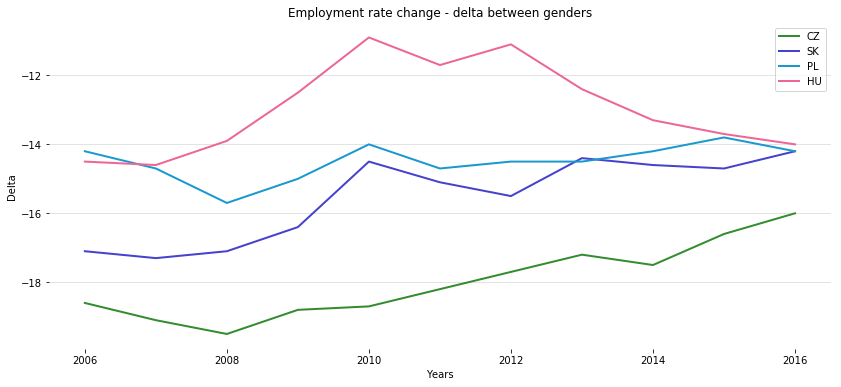

In [43]:
colors = ['#338c2f', '#4542cc','#1a99cf','#ec6699']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6), frameon=False)

for i, country in enumerate(focus_countries):
    
    x = joined_df2[ joined_df2.Country==country ].Year.values
    y = joined_df2[ joined_df2.Country==country ].Emp_FM_delta.values
    ax.plot(x, y, color=colors[i], linestyle='solid', linewidth='2')

ax.grid(which='major', axis='y', linestyle='solid', color="#bbbbbb", alpha=0.5)

ax.set_xlabel('Years')
ax.set_ylabel('Delta')

ax.set_title('Employment rate change - delta between genders')

ax.legend( [ c.upper() for c in focus_countries] )

ax.set_frame_on(False)

plt.show()

3 countries are converging to same point. The biggest gap still prevails in Czech republic, although compared to 2006 big improvement was observed. Rapid improvement is observed also in Slovakia.

### Change of population structure by age

For this question, I selected so called V4 countries (Slovakia, Czech Republic, Poland, Hungary).

In [44]:
top_labels = df_population.Age_group.unique().tolist()

In [45]:
y_data = joined_df2.Year.unique().tolist()

In [46]:
def get_x_data( country ):
    focus_cols = ['Pop_0_14','Pop_15_24','Pop_25_49','Pop_50_64','Pop_65_79','Pop_80_MAX']
    focus_cols_pre = ['Year','Pop_0_14','Pop_15_24','Pop_25_49','Pop_50_64','Pop_65_79','Pop_80_MAX']

    focus_country = country

    x_data_pre = joined_df2[ joined_df2.Country==focus_country ].loc[ :, focus_cols_pre ]

    x_data = []

    for index, row in x_data_pre.iterrows():
        x_data.append( row[ focus_cols ].tolist() )
    
    return x_data

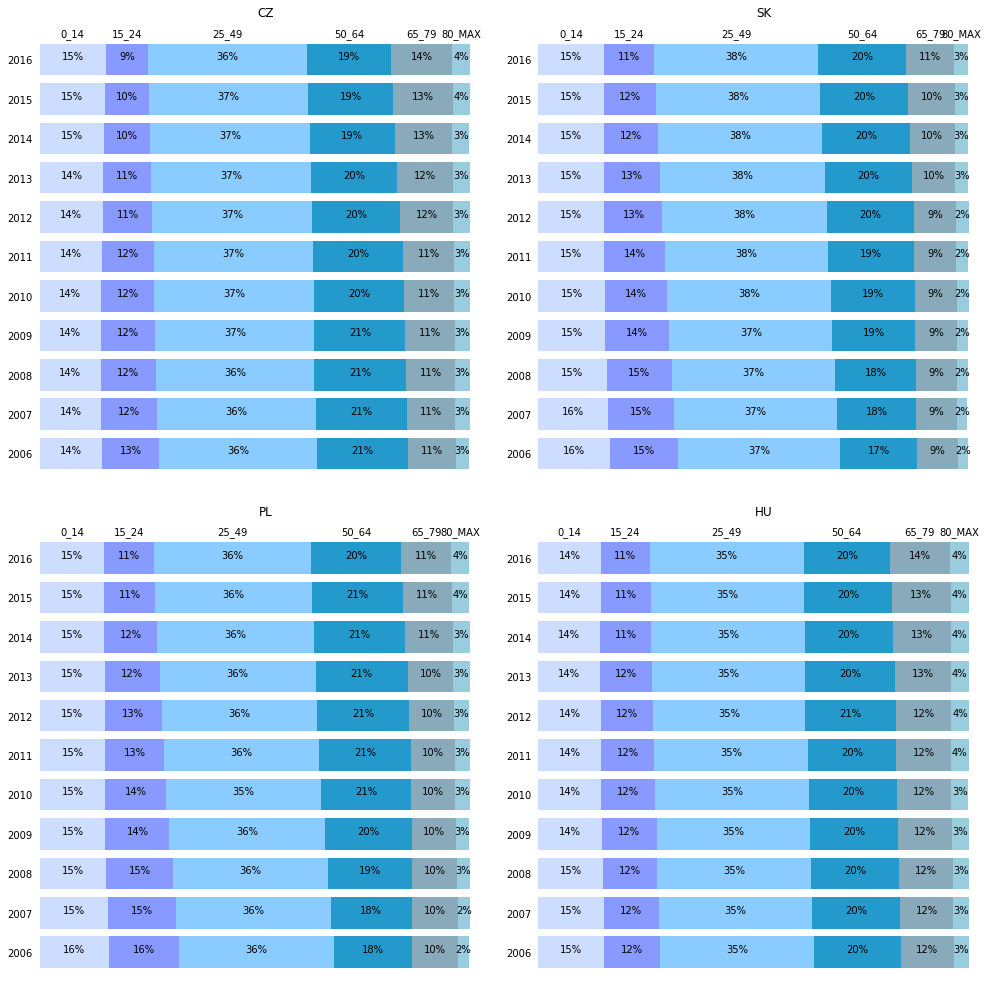

In [47]:
#import matplotlib.pyplot as plt
#import matplotlib as mpl

colors = ['#ccddff', '#8899ff','#8accff','#2399cc','#89aabb','#99ccdd']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14, 14), frameon=False)

def generate_plot(ax, c):

    data = np.array( get_x_data ( c ) )
    segments = len( data[0] )

    y_pos = np.arange( len(y_data) )

    data_t = np.transpose(data)
    patch_handles = []
    left = np.zeros( len(y_data) ) # left alignment of data starts at zero
    for i, d in enumerate(data_t):
        patch_handles.append( ax.barh( y_pos, d, left=left, color=colors[i]) )
        left += d

    # anotate
    for j in range( len(patch_handles) ):
        for i, patch in enumerate(patch_handles[j].get_children()):
            # head labels
            if (i == len(patch_handles[j].get_children()) - 1):
                bl = patch.get_xy()
                x = 0.5*patch.get_width() + bl[0]
                y = 2.5*0.5*patch.get_height() + bl[1]
                ax.text(x,y, top_labels[j], ha='center')

            # labels to each segment
            bl = patch.get_xy()
            x = 0.5*patch.get_width() + bl[0]
            y = 0.5*patch.get_height() + bl[1]
            ax.text(x,y, "%d%%" % (data[i,j]), ha='center')

    ax.set_frame_on(False)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_data)
    ax.set_title( c.upper() )
    
    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)


generate_plot(ax1, focus_countries[0])
generate_plot(ax2, focus_countries[1])
generate_plot(ax3, focus_countries[2])
generate_plot(ax4, focus_countries[3])

plt.tight_layout()
plt.show( )


In all 4 countries population is getting older, there are more people after 50, and less younger than 24 each year.

### Fertility and females employment rate

In [48]:
employment_rate_f = joined_df2.loc[:,['Emp_F']].values

fertility_rate = joined_df2.loc[:,['Fert']].values

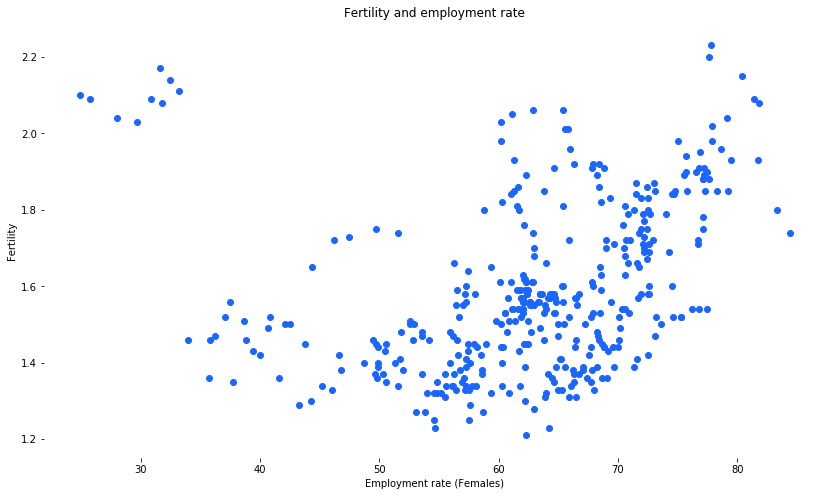

In [49]:
colors = ['#ccddff', '#6699ff','#1a66ff','#e6eeff','#1a66ff','#99ccff']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 8), frameon=False)

ax.scatter(employment_rate_f, fertility_rate, color=colors[2])
ax.set_xlabel('Employment rate (Females)')
ax.set_ylabel('Fertility')

ax.set_title('Fertility and employment rate')

ax.set_frame_on(False)

plt.show()

If question is narrowed down to comparison of feritility and employment rate, then there seems be positive correlation, however this is truth only for data >35.

### Comparison of age groups

For this task, Plot.ly libraries are used.

In [50]:
joined_df2['Pop_young'] = joined_df2['Pop_0_14'] + joined_df2['Pop_15_24'] + joined_df2['Pop_25_49']

In [51]:
#focus_countries = ['at', 'be', 'bg', 'cy', 'cz', 'de', 'dk', 'ee', 'es', 'fi', 'hr', 'hu', 'ie', 'it',
#                   'lt', 'lu', 'lv', 'mk', 'mt', 'nl', 'no', 'pl', 'pt', 'ro', 'se','si', 'sk', 'uk', 'ch', 'me', 'fr']

focus_countries = ['at', 'be', 'bg', 'cz', 'de', 'ee', 'es', 'fi', 'hr', 'hu', 'ie', 'it',
                   'lt', 'lv', 'mk', 'mt', 'nl', 'no', 'pl', 'pt', 'ro', 'se','si', 'sk', 'ch', 'me', 'fr']

In [52]:
df_for_visual = joined_df2[ 
                            ( joined_df2['Year'] == 2016 ) & 
                            ( joined_df2['Country'].isin( focus_countries )) ].loc[:,['Country','Pop_young','Latitude','Longitude']]

In [53]:
df_for_visual.describe().loc['min','Pop_young']

56.8

In [54]:
df_for_visual['Pop_young2'] = df_for_visual['Pop_young'] - 55

df_for_visual

,Country,Pop_young,Latitude,Longitude,Pop_young2
361,at,60.9,48.200000,16.366667,5.9
362,be,61.8,50.833333,4.333333,6.8
363,bg,59.0,42.683333,23.316667,4.0
364,ch,61.8,46.916667,7.466667,6.8
366,cz,62.2,50.083333,14.466667,7.2
367,de,56.8,52.516667,13.400000,1.8
371,ee,61.3,59.433889,24.728056,6.3
373,es,61.6,40.408566,-3.692220,6.6
376,fi,59.2,60.175556,24.934167,4.2
377,fr,62.0,48.866667,2.333333,7.0


In [55]:
datapoints = []

value_col = 'Pop_young2'

scale = 15

for c in focus_countries:
    df_sub = df_for_visual [ df_for_visual.Country==c ]
    datapoint = dict(
        type = 'scattergeo',
        locationmode = 'europe',
        lon = df_sub['Longitude'],
        lat = df_sub['Latitude'],
        text = c.upper() ,
        marker = dict(
            size = df_sub[value_col] * scale,
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = c.upper()
    )
    datapoints.append(datapoint)

layout = dict(
        title = 'Younger age groups (0 - 49), differencies between countries',
        showlegend = True, 
        width = 900,
        height = 600,
        geo = dict(
            scope='europe',
            projection=dict( type='azimuthal equal area' ),
            showland = True,
            landcolor = 'rgb(243, 243, 243)',
            countrycolor = 'rgb(204, 204, 204)',
        ),
    )

fig = dict(data=datapoints, layout=layout)
py.iplot(fig, validate=False, filename='d3-bubble-map-populations')

It is interesting to compare differencies among selected European countries. For instance, from population structure perspective, Germany and Italy have way less young people as compared to Ireland, Macedonia, Poland, Slovakia or Norway.

______________
Chart with map is also available at https://plot.ly/~bezittto/73/younger-age-groups-0-49-differencies-between-countries/<br>
If url is not reachable, below is rendered output.

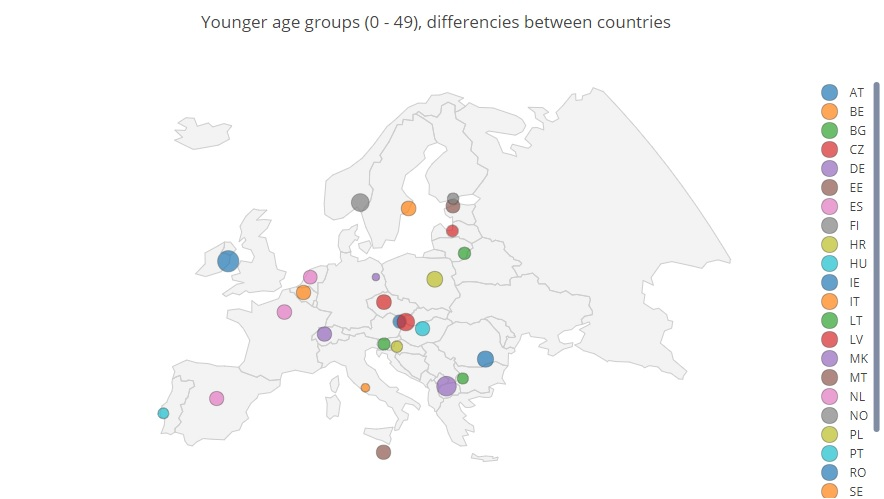

In [1]:
# if plot.ly is now showing result, then render this image
from IPython.display import Image
Image(filename='plotly-render-younger-age-groups.jpg') 